In [131]:
import pandas as pd
import numpy as np

In [132]:
df = pd.read_csv('./data_reference/Sample Data.csv')

In [133]:
df.head()

,INCOME,WAGEINC,BUSSEFARMINC,INTDIVINC,KGINC,TRANSFOTHINC,SSRETINC,ASSET,DEBT,NETWORTH,...,isFinancialQualified,PERCENTLIQUIDASSETS,PERCENTILLIQUIDASSETS,PERCENTSTOCKS,PERCENTBOND,PERCENTFINOTHERS,PERCENTFIXEDINCOME,PERCENTVARIABLEINCOME,PERCENTOTHERINCOME,COMMITMENTAMOUNT
0,619630.541086,126607.201904,-6851.683868,16414.251353,484086.360227,0.000000,0.0,1723051.2,351390.0,1371661.2,...,True,0.533919,0.466081,0.400045,0.000000,0.066036,0.204327,0.796683,-0.001010,1.506898e+06
1,640483.491986,253214.403808,0.000000,0.000000,297899.298598,89369.789579,0.0,1033500.0,663507.0,369993.0,...,False,1.000000,0.000000,0.000000,0.000000,0.000000,0.395349,0.465116,0.139535,3.775701e+05
2,312794.263533,297899.298598,0.000000,74.474825,14894.964929,0.000000,0.0,830520.6,286624.0,543896.6,...,False,0.267475,0.732525,0.000000,0.075101,0.657423,0.952381,0.047857,-0.000238,6.370112e+05
3,350031.675856,342584.193388,0.000000,0.000000,7596.432114,0.000000,0.0,1366976.0,542932.0,824044.0,...,False,0.009434,0.990566,0.707547,0.000000,0.283019,0.978723,0.021702,-0.000426,9.700267e+05
4,403653.549601,402164.053100,0.000000,14.894965,0.000000,0.000000,0.0,1227522.4,201188.0,1026334.4,...,False,0.410815,0.589185,0.042135,0.000000,0.547051,0.996310,0.000037,0.003653,3.794484e+05


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   INCOME                 457 non-null    float64
 1   WAGEINC                457 non-null    float64
 2   BUSSEFARMINC           457 non-null    float64
 3   INTDIVINC              457 non-null    float64
 4   KGINC                  457 non-null    float64
 5   TRANSFOTHINC           457 non-null    float64
 6   SSRETINC               457 non-null    float64
 7   ASSET                  457 non-null    float64
 8   DEBT                   457 non-null    float64
 9   NETWORTH               457 non-null    float64
 10  HOUSES                 457 non-null    float64
 11  MRTHEL                 457 non-null    float64
 12  NFIN                   457 non-null    float64
 13  FIN                    457 non-null    float64
 14  ODEBT                  457 non-null    float64
 15  LIQ   

In [135]:
df['FIXEDINCOME'] = df['PERCENTFIXEDINCOME'] * df['INCOME']
df['VARIABLEINCOME'] = df['PERCENTVARIABLEINCOME'] * df['INCOME']
df['OTHERINCOME'] = df['PERCENTOTHERINCOME'] * df['INCOME']

In [136]:
df['NUMBERSOURCEOFFUNDS'] = (df['WAGEINC'] > 0).astype(int) + (df['BUSSEFARMINC'] > 0).astype(int) + (df['INTDIVINC'] > 0).astype(int) + (df['KGINC'] > 0).astype(int) + (df['TRANSFOTHINC'] > 0).astype(int) + (df['SSRETINC'] > 0).astype(int)

In [137]:
concise_df = df.drop(columns=[
    'WGT', 'Age Group',
    'WAGEINC', 'BUSSEFARMINC', 'INTDIVINC', 'KGINC', 'TRANSFOTHINC', 'SSRETINC',
    'ASSET', 'DEBT', 'MRTHEL', 'FIN', 'ODEBT',
    'BOND', 'STOCKS', 'IRAKH', 'OTHMA', 'NETHOUSE', 'NETFIN', 'NETHOUSECLIPPED', 'NETHOUSEDIFF', 'NETWORTHADJUSTED',
    'PERCENTLIQUIDASSETS', 'PERCENTILLIQUIDASSETS', 'PERCENTSTOCKS', 'PERCENTBOND', 'PERCENTFINOTHERS',
    'PERCENTFIXEDINCOME', 'PERCENTVARIABLEINCOME', 'PERCENTOTHERINCOME',
])
concise_df = concise_df.rename(columns={
    'NETWORTH': 'PERSONALASSETS',
    'HOUSES': 'RESIDENCEVALUE',
    'NFIN': 'FINANCIALASSETS',
    'LIQ': 'LIQUIDASSETS',
    'isIncomeQualified': 'INCOMEQUALIFIED',
    'isPersonalQualified': 'PERSONALQUALIFIED',
    'isFinancialQualified': 'FINANCIALQUALIFIED',
})
concise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INCOME               457 non-null    float64
 1   PERSONALASSETS       457 non-null    float64
 2   RESIDENCEVALUE       457 non-null    float64
 3   FINANCIALASSETS      457 non-null    float64
 4   LIQUIDASSETS         457 non-null    float64
 5   AGE                  457 non-null    int64  
 6   PERSONALQUALIFIED    457 non-null    bool   
 7   INCOMEQUALIFIED      457 non-null    bool   
 8   FINANCIALQUALIFIED   457 non-null    bool   
 9   COMMITMENTAMOUNT     457 non-null    float64
 10  FIXEDINCOME          456 non-null    float64
 11  VARIABLEINCOME       456 non-null    float64
 12  OTHERINCOME          456 non-null    float64
 13  NUMBERSOURCEOFFUNDS  457 non-null    int64  
dtypes: bool(3), float64(9), int64(2)
memory usage: 40.7 KB


In [138]:
concise_df.head()

,INCOME,PERSONALASSETS,RESIDENCEVALUE,FINANCIALASSETS,LIQUIDASSETS,AGE,PERSONALQUALIFIED,INCOMEQUALIFIED,FINANCIALQUALIFIED,COMMITMENTAMOUNT,FIXEDINCOME,VARIABLEINCOME,OTHERINCOME,NUMBERSOURCEOFFUNDS
0,619630.541086,1371661.2,427180.0,500214.0,652896.4,35,False,True,True,1.506898e+06,126607.201904,493648.927712,-625.588530,3
1,640483.491986,369993.0,869518.0,989404.0,44096.0,34,False,True,False,3.775701e+05,253214.403808,297899.298598,89369.789581,3
2,312794.263533,543896.6,551200.0,591988.8,63801.4,31,False,True,False,6.370112e+05,297899.298598,14969.439754,-74.474819,3
3,350031.675856,824044.0,490568.0,490568.0,8268.0,35,False,True,False,9.700267e+05,342584.193388,7596.432114,-148.949647,2
4,403653.549601,1026334.4,757900.0,835068.0,161226.0,33,False,True,False,3.794484e+05,402164.053100,14.894965,1474.601537,2


In [139]:
# Generate CritialIllness
# https://www.greateasternlife.com/sg/en/personal-insurance/lifepedia/medical-coverage/top-3-critical-illnesses-health-trends.html#:~:text=1%20in%204%20to%205,with%20a%20Critical%20Illness5.
chance_of_critical_illness = 0.225

In [140]:
concise_df['HASCRITICALILLNESS'] = np.random.rand(len(concise_df)) < chance_of_critical_illness

In [141]:
# Generate HasLPA
# Number of people aged 50 and above with LPA: 233,000 - https://www.greateasternlife.com/sg/en/personal-insurance/lifepedia/medical-coverage/top-3-critical-illnesses-health-trends.html#:~:text=1%20in%204%20to%205,with%20a%20Critical%20Illness5.

In [142]:
age_df = pd.read_csv('./data_reference/Singapore Residents Age Sex.csv')

In [143]:
# Filter the age_df to get the number of people aged 50 and above in 2024
age_50_and_above_2024 = age_df[age_df['Data Series'].str.contains('50 Year|51 Year|52 Year|53 Year|54 Year|55 Year|56 Year|57 Year|58 Year|59 Year|60 Year|61 Year|62 Year|63 Year|64 Year|65 Year|66 Year|67 Year|68 Year|69 Year|70 Year|71 Year|72 Year|73 Year|74 Year|75 Year|76 Year|77 Year|78 Year|79 Year|80 Year|81 Year|82 Year|83 Year|84 Year|85 Year|86 Year|87 Year|88 Year|89 Year')]
number_of_people_50_and_above_2024 = int(age_50_and_above_2024['2024 '].sum())
number_of_people_50_and_above_2024_with_lpa = 233000


In [144]:
percent_of_people_50_and_above_2024_with_lpa = number_of_people_50_and_above_2024_with_lpa / number_of_people_50_and_above_2024
percent_of_people_50_and_above_2024_with_lpa

0.14321249599711855

In [145]:
concise_df['HASLPA'] = np.random.rand(len(concise_df)) < percent_of_people_50_and_above_2024_with_lpa

In [146]:
concise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INCOME               457 non-null    float64
 1   PERSONALASSETS       457 non-null    float64
 2   RESIDENCEVALUE       457 non-null    float64
 3   FINANCIALASSETS      457 non-null    float64
 4   LIQUIDASSETS         457 non-null    float64
 5   AGE                  457 non-null    int64  
 6   PERSONALQUALIFIED    457 non-null    bool   
 7   INCOMEQUALIFIED      457 non-null    bool   
 8   FINANCIALQUALIFIED   457 non-null    bool   
 9   COMMITMENTAMOUNT     457 non-null    float64
 10  FIXEDINCOME          456 non-null    float64
 11  VARIABLEINCOME       456 non-null    float64
 12  OTHERINCOME          456 non-null    float64
 13  NUMBERSOURCEOFFUNDS  457 non-null    int64  
 14  HASCRITICALILLNESS   457 non-null    bool   
 15  HASLPA               457 non-null    boo

In [147]:
concise_df_ordered = concise_df[[
    'INCOME', 'FIXEDINCOME', 'VARIABLEINCOME', 'OTHERINCOME',
    'PERSONALASSETS', 'RESIDENCEVALUE', 'LIQUIDASSETS',
    'FINANCIALASSETS',
    'AGE', 'HASLPA', 'HASCRITICALILLNESS', 'NUMBERSOURCEOFFUNDS',
    'COMMITMENTAMOUNT',
    'INCOMEQUALIFIED', 'PERSONALQUALIFIED', 'FINANCIALQUALIFIED',
]]

In [148]:
concise_df_ordered.to_csv('./data_reference/cleaned_sample_data.csv', index=False)

### Apply Red Flag Labelling

In [163]:
df = pd.read_csv('./data_reference/cleaned_sample_data.csv')

In [164]:
df.head()

,INCOME,FIXEDINCOME,VARIABLEINCOME,OTHERINCOME,PERSONALASSETS,RESIDENCEVALUE,LIQUIDASSETS,FINANCIALASSETS,AGE,HASLPA,HASCRITICALILLNESS,NUMBERSOURCEOFFUNDS,COMMITMENTAMOUNT,INCOMEQUALIFIED,PERSONALQUALIFIED,FINANCIALQUALIFIED
0,619630.541086,126607.201904,493648.927712,-625.588530,1371661.2,427180.0,652896.4,500214.0,35,False,False,3,1.506898e+06,True,False,True
1,640483.491986,253214.403808,297899.298598,89369.789581,369993.0,869518.0,44096.0,989404.0,34,False,True,3,3.775701e+05,True,False,False
2,312794.263533,297899.298598,14969.439754,-74.474819,543896.6,551200.0,63801.4,591988.8,31,False,False,3,6.370112e+05,True,False,False
3,350031.675856,342584.193388,7596.432114,-148.949647,824044.0,490568.0,8268.0,490568.0,35,False,False,2,9.700267e+05,True,False,False
4,403653.549601,402164.053100,14.894965,1474.601537,1026334.4,757900.0,161226.0,835068.0,33,False,False,2,3.794484e+05,True,False,False


In [166]:
class Investor:
    INCOME: float
    FIXEDINCOME: float
    VARIABLEINCOME: float
    OTHERINCOME: float
    PERSONALASSETS: float
    RESIDENCEVALUE: float
    LIQUIDASSETS: float
    FINANCIALASSETS: float
    AGE: int
    HASLPA: bool
    HASCRITICALILLNESS: bool
    NUMBERSOURCEOFFUNDS: int
    COMMITMENTAMOUNT: float
    INCOMEQUALIFIED: bool
    PERSONALQUALIFIED: bool
    FINANCIALQUALIFIED: bool



In [167]:
def red_flag_algorithm_based_on_qualifier(investor: Investor):
    num_red_flags = 0

    if investor.COMMITMENTAMOUNT == 0:
        raise Exception('Commitment Amount cannot be zero')


    # income qualifier
    if investor.INCOMEQUALIFIED:
        if investor.FIXEDINCOME:
            if investor.VARIABLEINCOME:
                if (investor.FIXEDINCOME + investor.VARIABLEINCOME) / investor.COMMITMENTAMOUNT < 2:
                    num_red_flags += 1

            else:
                if investor.FIXEDINCOME / investor.COMMITMENTAMOUNT < 1:
                    num_red_flags += 2


    # personal asset qualifier
    elif investor.PERSONALQUALIFIED:
        if investor.INCOME:
            if investor.LIQUIDASSETS:
                income_liquid_assets_to_ca_ratio = (investor.LIQUIDASSETS + investor.INCOME) / investor.COMMITMENTAMOUNT

                if income_liquid_assets_to_ca_ratio < 1:
                    num_red_flags += 3
                elif income_liquid_assets_to_ca_ratio < 2:
                    num_red_flags += 2

            else:
                if investor.INCOME / investor.COMMITMENTAMOUNT < 2:
                    num_red_flags += 1


    # financial asset qualifier
    elif investor.FINANCIALQUALIFIED:
        if investor.INCOME:
            if investor.FINANCIALASSETS:
                income_financial_assets_to_ca_ratio = (investor.FINANCIALASSETS + investor.INCOME) / investor.COMMITMENTAMOUNT

                if income_financial_assets_to_ca_ratio < 1:
                    num_red_flags += 3
                elif income_financial_assets_to_ca_ratio < 2:
                    num_red_flags += 2

            else:
                if investor.INCOME / investor.COMMITMENTAMOUNT < 2:
                    num_red_flags += 1


    qualifier_red_flags = num_red_flags


    # demographics
    if investor.AGE > 65:
        if investor.AGE > 75:
            if investor.HASLPA:
                num_red_flags += 1
            else:
                num_red_flags += 2
        
        if investor.INCOME / investor.COMMITMENTAMOUNT < 2:
            num_red_flags += 1

    if investor.HASCRITICALILLNESS:
        num_red_flags += 1

    if investor.NUMBERSOURCEOFFUNDS < 3:
        num_red_flags += 1


    demographic_red_flags = num_red_flags - qualifier_red_flags

    return num_red_flags, qualifier_red_flags, demographic_red_flags

In [168]:
for index, row in df.iterrows():
    investor = Investor()
    for key, value in row.to_dict().items():
        setattr(investor, key, value)
    num_red_flags, qualifier_red_flags, demographic_red_flags = red_flag_algorithm_based_on_qualifier(investor)
    df.at[index, 'REDFLAGS'] = num_red_flags
    df.at[index, 'QUALIFIER_REDFLAGS'] = qualifier_red_flags
    df.at[index, 'DEMOGRAPHIC_REDFLAGS'] = demographic_red_flags



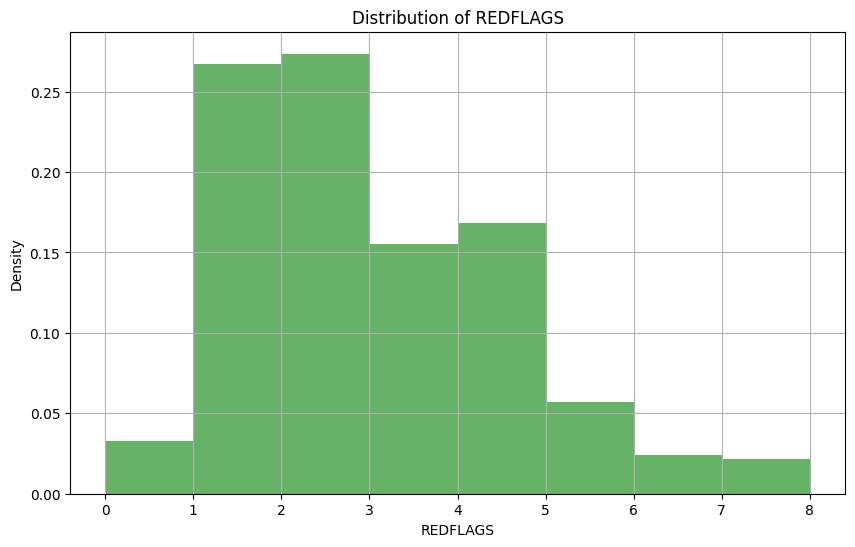

In [169]:
import matplotlib.pyplot as plt

# Plot the distribution of the REDFLAGS column
plt.figure(figsize=(10, 6))
bins = sorted(df['REDFLAGS'].unique())
plt.hist(df['REDFLAGS'], bins=bins, alpha=0.6, color='g', density=True)
plt.title('Distribution of REDFLAGS')
plt.xlabel('REDFLAGS')
plt.ylabel('Density')
plt.xticks(np.arange(min(bins), max(bins) + 1, 1))

plt.grid(True)
plt.show()


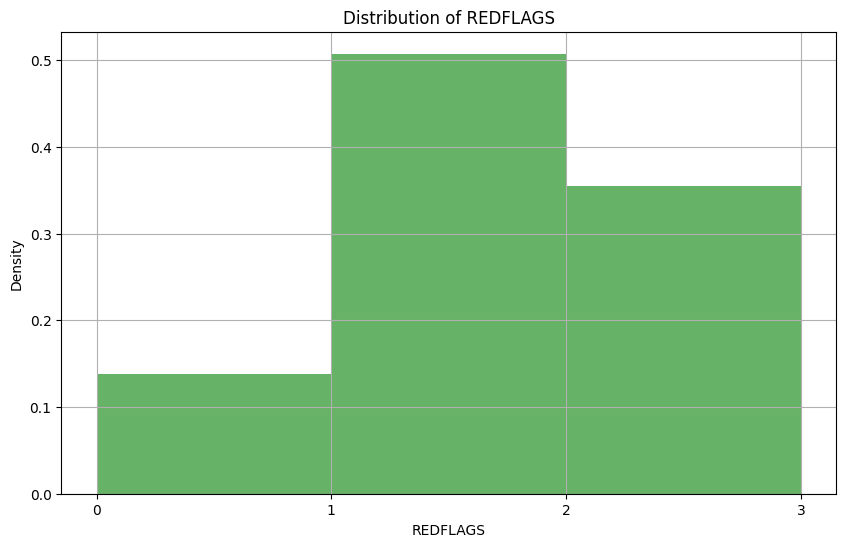

In [170]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the distribution of the REDFLAGS column
plt.figure(figsize=(10, 6))
bins = sorted(df['QUALIFIER_REDFLAGS'].unique())
plt.hist(df['QUALIFIER_REDFLAGS'], bins=bins, alpha=0.6, color='g', density=True)
plt.title('Distribution of REDFLAGS')
plt.xlabel('REDFLAGS')
plt.ylabel('Density')
plt.grid(True)
plt.xticks(np.arange(min(bins), max(bins) + 1, 1))

plt.show()


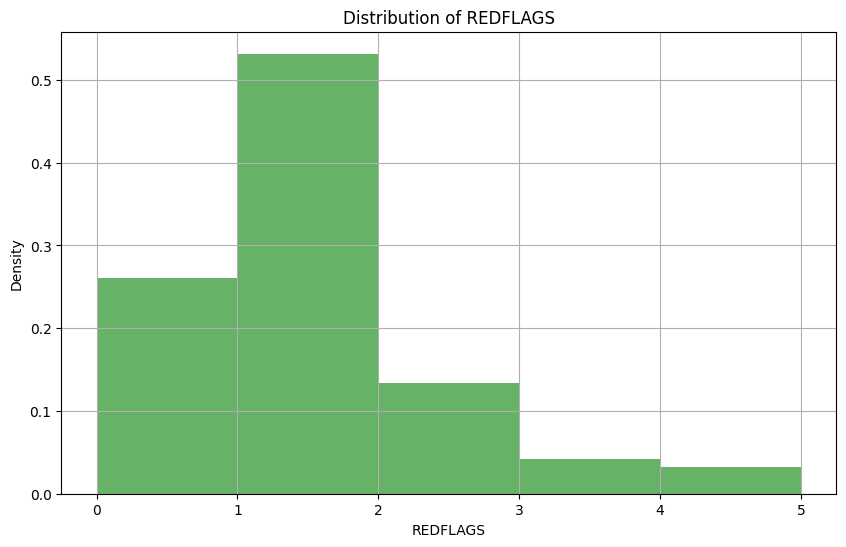

In [171]:
import matplotlib.pyplot as plt

# Plot the distribution of the REDFLAGS column
plt.figure(figsize=(10, 6))
bins = sorted(df['DEMOGRAPHIC_REDFLAGS'].unique())
plt.hist(df['DEMOGRAPHIC_REDFLAGS'], bins=bins, alpha=0.6, color='g', density=True)
plt.title('Distribution of REDFLAGS')
plt.xlabel('REDFLAGS')
plt.ylabel('Density')
plt.xticks(np.arange(min(bins), max(bins) + 1, 1))

plt.grid(True)
plt.show()


In [172]:
df.to_csv('./data_reference/cleaned_labelled_sample_data.csv', index=False)

In [178]:
df.shape

(457, 19)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   INCOME                457 non-null    float64
 1   FIXEDINCOME           456 non-null    float64
 2   VARIABLEINCOME        456 non-null    float64
 3   OTHERINCOME           456 non-null    float64
 4   PERSONALASSETS        457 non-null    float64
 5   RESIDENCEVALUE        457 non-null    float64
 6   LIQUIDASSETS          457 non-null    float64
 7   FINANCIALASSETS       457 non-null    float64
 8   AGE                   457 non-null    int64  
 9   HASLPA                457 non-null    bool   
 10  HASCRITICALILLNESS    457 non-null    bool   
 11  NUMBERSOURCEOFFUNDS   457 non-null    int64  
 12  COMMITMENTAMOUNT      457 non-null    float64
 13  INCOMEQUALIFIED       457 non-null    bool   
 14  PERSONALQUALIFIED     457 non-null    bool   
 15  FINANCIALQUALIFIED    4

In [173]:
df.describe()

,INCOME,FIXEDINCOME,VARIABLEINCOME,OTHERINCOME,PERSONALASSETS,RESIDENCEVALUE,LIQUIDASSETS,FINANCIALASSETS,AGE,NUMBERSOURCEOFFUNDS,COMMITMENTAMOUNT,REDFLAGS,QUALIFIER_REDFLAGS,DEMOGRAPHIC_REDFLAGS
count,4.570000e+02,4.560000e+02,4.560000e+02,456.000000,4.570000e+02,4.570000e+02,4.570000e+02,4.570000e+02,457.000000,457.000000,4.570000e+02,457.000000,457.000000,457.000000
mean,6.950479e+05,3.786678e+05,3.098724e+05,8031.900785,6.528319e+06,1.297325e+06,3.312190e+05,3.905484e+06,56.201313,2.660832,3.707980e+06,2.540481,1.479212,1.061269
std,1.744320e+06,4.390171e+05,1.689257e+06,62289.448213,1.585996e+07,1.663236e+06,8.006290e+05,1.251044e+07,13.288918,1.098672,7.721791e+06,1.559845,1.026034,0.948550
min,0.000000e+00,0.000000e+00,-4.691914e+04,-139118.972444,1.570920e+04,0.000000e+00,1.378000e+02,0.000000e+00,26.000000,1.000000,9.627883e+03,0.000000,0.000000,0.000000
25%,2.681094e+05,1.608656e+05,2.978993e+02,-148.949649,1.580290e+06,5.236400e+05,4.437160e+04,7.344740e+05,47.000000,2.000000,6.812220e+05,1.000000,1.000000,0.000000
50%,3.783321e+05,2.978993e+05,2.383194e+04,0.000000,3.055026e+06,8.957000e+05,1.139606e+05,1.535092e+06,57.000000,3.000000,1.607439e+06,2.000000,1.000000,1.000000
75%,6.255885e+05,4.259960e+05,1.625450e+05,595.798602,6.265353e+06,1.515800e+06,3.059160e+05,3.088098e+06,66.000000,3.000000,3.617557e+06,4.000000,3.000000,1.000000
max,3.016230e+07,5.957986e+06,2.978993e+07,893489.366288,2.539839e+08,2.067000e+07,7.062250e+06,2.224938e+08,84.000000,6.000000,9.663858e+07,8.000000,3.000000,5.000000


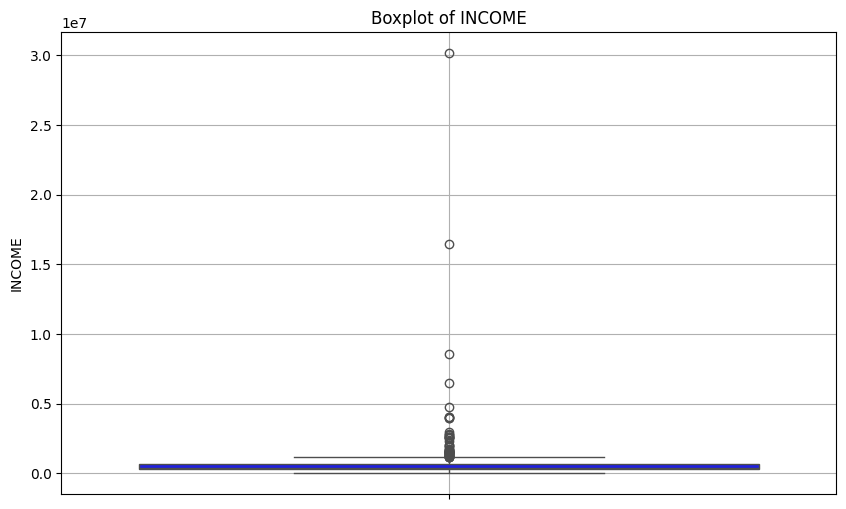

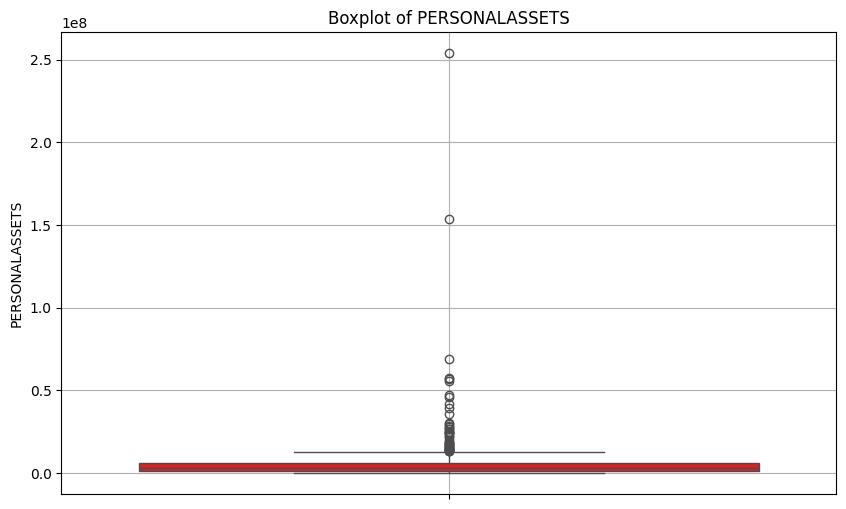

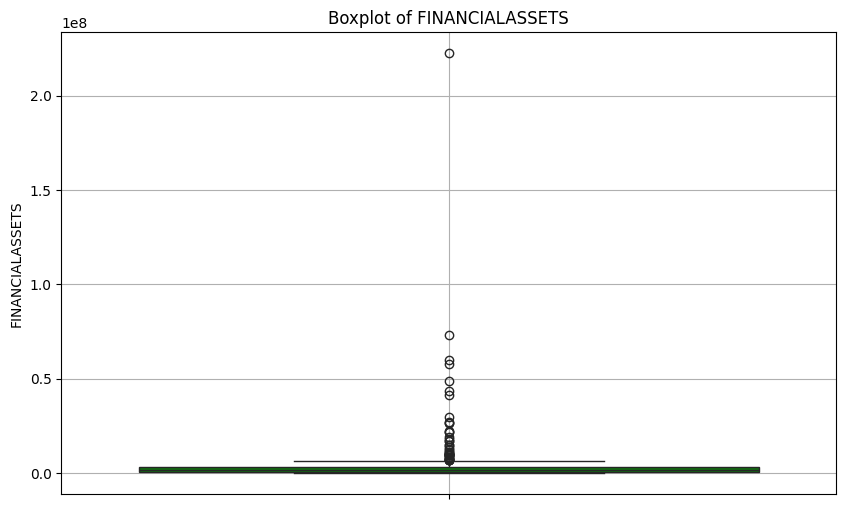

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the boxplot of INCOME
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['INCOME'], color='b')
plt.title('Boxplot of INCOME')
plt.ylabel('INCOME')
plt.grid(True)
plt.show()

# Plot the boxplot of PERSONALASSETS
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['PERSONALASSETS'], color='r')
plt.title('Boxplot of PERSONALASSETS')
plt.ylabel('PERSONALASSETS')
plt.grid(True)
plt.show()

# Plot the boxplot of FINANCIALASSETS
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['FINANCIALASSETS'], color='g')
plt.title('Boxplot of FINANCIALASSETS')
plt.ylabel('FINANCIALASSETS')
plt.grid(True)
plt.show()
